<a href="https://colab.research.google.com/github/chandusayhi/AutomatedQuestionAnseringSystem/blob/main/BagOfWords_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd;

#Loading dataset and rename columns

df=pd.read_excel("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Deep_Learning_ML_Engineering/data/healthtapQAs_v1.xlsx");
df.columns=["questions","answers"];

df.head(3)

,questions,answers
0,zirconium dental implants. how common is it us...,a majority of the dental implants placed are t...
1,zoloft/ sertaline cause heart racing can't sit...,check with your doc could be side effect of th...
2,zoloft (sertraline) side effects? does it make...,it can be related to either weight gain or los...


##Data Preprocessing

In [ ]:
import re
import gensim 
from gensim.parsing.preprocessing import remove_stopwords

#keeping only words in the sentence and removing punctuations.
def clean_sentence(sentence, stopwords=False):
    
    sentence = sentence.lower().strip()
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence)

    
    if stopwords:
         sentence = remove_stopwords(sentence)
    
    
    return sentence
                    
def get_cleaned_sentences(df,stopwords=False):    
    sents=df[["questions"]];
    cleaned_sentences=[]

    for index,row in df.iterrows():
        #print(index,row)
        cleaned=clean_sentence(row["questions"],stopwords);
        cleaned_sentences.append(cleaned);
    return cleaned_sentences;

cleaned_sentences=get_cleaned_sentences(df,stopwords=True)
#print(cleaned_sentences);

print("\n")

cleaned_sentences_with_stopwords=get_cleaned_sentences(df,stopwords=False)
print(cleaned_sentences_with_stopwords[0]);



zirconium dental implants how common is it used now is there any advantages or benefits over titanium implants cons  pros please thanks


In [ ]:
print(cleaned_sentences_with_stopwords[0]);

zirconium dental implants how common is it used now is there any advantages or benefits over titanium implants cons  pros please thanks


##Bag of words Model

In [ ]:
import numpy
import pprint

sentences=cleaned_sentences_with_stopwords
#creating bag of words model

# Split it by white space 
sentence_words = [[word for word in document.split() ]
         for document in sentences]

from gensim import corpora

dictionary = corpora.Dictionary(sentence_words)
'''
for key, value in dictionary.items():
    print(key, ' : ', value)
'''

bow_corpus = [dictionary.doc2bow(text) for text in sentence_words]
'''
for sent,embedding in zip(sentences,bow_corpus):
    print(sent)
    print(embedding)
'''


'\nfor sent,embedding in zip(sentences,bow_corpus):\n    print(sent)\n    print(embedding)\n'

In [ ]:
question_orig="How to remain healthy?"
#question_orig=input()
question=clean_sentence(question_orig,stopwords=False);
print(question)
question_embedding = dictionary.doc2bow(question.split())


print("\n\n",question,"\n",question_embedding)

how to remain healthy


 how to remain healthy 
 [(6, 1), (65, 1), (971, 1), (3013, 1)]


In [ ]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity;
def retrieveAndPrintFAQAnswer(question_embedding,sentence_embeddings,FAQdf,sentences):
    max_sim=-1;
    index_sim=-1;
    for index,faq_embedding in enumerate(sentence_embeddings):
        
        sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
        #print(index, sim, sentences[index])
        if sim>max_sim:
            max_sim=sim;
            index_sim=index;
       
    print("\n")
    print("Question: ",question)
    print("\n");
    print("Retrieved: ",FAQdf.iloc[index_sim,0]) 
    print("Answer:",FAQdf.iloc[index_sim,1])        
    
retrieveAndPrintFAQAnswer(question_embedding,bow_corpus,df,sentences);



Question:  how is your health


Retrieved:  yesterday i got cut on a rusty barbed wire fence. my last tetanus shot was 4 years ago. do i need a booster? how could the germs live out in the sun?
Answer: you get at least 5 years from a booster so you should be ok if you cleaned the wound well. it is not the germs of tetanis but the "eggs" or spores of the germ that can survive for years in the dust & "hatch" when they are in the presence of the serum from tissues in a wound.


#Implementing Chatbot using Bag of Words

In [ ]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity;
import time

print("Welcome to the Question Answering System")      

while True:
  print("Question:") 
  
  question_orig=input()
  
  if (question_orig.lower()=='quit'):
    break
  measure1 = time.time()
  question=clean_sentence(question_orig,stopwords=False);
  question_embedding = dictionary.doc2bow(question.split())        
  def retrieveAndPrintFAQAnswer(question_embedding,sentence_embeddings,FAQdf,sentences):
    max_sim=-1;
    index_sim=-1;
    for index,faq_embedding in enumerate(sentence_embeddings):
      sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
      #print(index, sim, sentences[index])
      if sim>max_sim:
        max_sim=sim;
        index_sim=index;
    #print("\n")
    #print("Question: ",question)
    #print("\n");
    #print("Retrieved: ",FAQdf.iloc[index_sim,0])
    
    print("Answer:",FAQdf.iloc[index_sim,1])
    print("----------------------")
    measure2 = time.time()
    print("Response Time",measure2 - measure1)
    print("----------------------")
    print("\n");
    print("Enter Quit to exit: ")
    
  retrieveAndPrintFAQAnswer(question_embedding,bow_corpus,df,sentences);  

  
  
  

print("----------------------")
print("Thank You")
print("----------------------")

Welcome to the Question Answering System
Question:
How to eat which keeps you healthy for longer time?
Answer: you get at least 5 years from a booster so you should be ok if you cleaned the wound well. it is not the germs of tetanis but the "eggs" or spores of the germ that can survive for years in the dust & "hatch" when they are in the presence of the serum from tissues in a wound.
----------------------
Response Time 17.89905309677124
----------------------


Enter Quit to exit: 
Question:
How is your health?
Answer: you get at least 5 years from a booster so you should be ok if you cleaned the wound well. it is not the germs of tetanis but the "eggs" or spores of the germ that can survive for years in the dust & "hatch" when they are in the presence of the serum from tissues in a wound.
----------------------
Response Time 8.711024522781372
----------------------


Enter Quit to exit: 
Question:
quit
----------------------
Thank You
----------------------


#Dataset2-Easy

## Importing Data

In [ ]:
import pandas as pd;
#Loading dataset and renaming columns

df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Deep_Learning_ML_Engineering/data/FAQ_standard.csv");
df.columns=["questions","answers","AnswerCode"];

df

,questions,answers,AnswerCode
0,What does the job hunting experience look like ?,Job hunting experience involves networking to ...,1
1,Any insights you can offer about the DS job ma...,"There are many kinds of roles, data scientist,...",2
2,What's the impact of Covid on hiring for DS ro...,Hiring is going to slow down. First in small c...,3
3,What skills and qualities do employers look fo...,The following are some skills employers usuall...,4
4,Do employers look for an advanced ML degree?,For more senior roles: People typically look f...,5
5,How does a typical day of a data scientist loo...,Here are some tasks in the typical day of a da...,6
6,Is preparation of algorithms and data structur...,Yes. In many data science interviews (ML Scien...,7
7,What is the mathematical background required t...,The following three are the basic building blo...,8
8,What are the various rounds in a data scientis...,Usually the data science interview has a subse...,9
9,What level of proficiency is needed for a data...,"Needs to be reasonably proficient. Again, a da...",10


In [ ]:
import pandas as pd;

#Load dataset and rename columns 

df_test=pd.read_excel("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Deep_Learning_ML_Engineering/data/FAQ_test_Easy.xlsx")
df_test.columns=["questions","ActualCode","PredictedCode","Prediction?","ActualQuestion","PredictedQuestion"]

df_test

,questions,ActualCode,PredictedCode,Prediction?,ActualQuestion,PredictedQuestion
0,How is the job searching experience nowadays?,1,NaN,NaN,What does the job hunting experience look like ?,NaN
1,"How are the DS jobs on the market, please?",2,NaN,NaN,Any insights you can offer about the DS job ma...,NaN
2,How is DS hiring impacted due to Covid?,3,NaN,NaN,What's the impact of Covid on hiring for DS ro...,NaN
3,In a data scientist what qualifications and at...,4,NaN,NaN,What skills and qualities do employers look fo...,NaN
4,Are employers looking for an advanced ML degree?,5,NaN,NaN,Do employers look for an advanced ML degree?,NaN
5,On a typical day what does a data scientist do?,6,NaN,NaN,How does a typical day of a data scientist loo...,NaN
6,Do we need to study algorithms for a data scie...,7,NaN,NaN,Is preparation of algorithms and data structur...,NaN
7,What is the mathematical background needed to ...,8,NaN,NaN,What is the mathematical background required t...,NaN
8,How many rounds of interview are in a data sc...,9,NaN,NaN,What are the various rounds in a data scientis...,NaN
9,How proficient a data scientist has to be in c...,10,NaN,NaN,What level of proficiency is needed for a data...,NaN


##Data Processing

In [ ]:
import re
import gensim 
from gensim.parsing.preprocessing import remove_stopwords


def clean_sentence(sentence, stopwords=False):
    
    sentence = sentence.lower().strip()
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence)

    
    if stopwords:
         sentence = remove_stopwords(sentence)
    
    
    return sentence
                    
def get_cleaned_sentences(tf,stopwords=False):    
    sents=tf[["questions"]];
    cleaned_sentences=[]

    for index,row in tf.iterrows():
        #print(index,row)
        cleaned=clean_sentence(row["questions"],stopwords);
        cleaned_sentences.append(cleaned);
    return cleaned_sentences;

cleaned_sentences=get_cleaned_sentences(df,stopwords=True)
print(cleaned_sentences);

print("\n")

cleaned_sentences_with_stopwords=get_cleaned_sentences(df,stopwords=False)
print(cleaned_sentences_with_stopwords);

['job hunting experience look like', 'insights offer ds job market', 'whats impact covid hiring ds roles', 'skills qualities employers look data scientist', 'employers look advanced ml degree', 'typical day data scientist look like', 'preparation algorithms data structures needed data science interview', 'mathematical background required data scientist', 'rounds data scientist interview', 'level proficiency needed data scientist coding']


['what does the job hunting experience look like ', 'any insights you can offer about the ds job market ', 'whats the impact of covid on hiring for ds roles', 'what skills and qualities do employers look for in a data scientist', 'do employers look for an advanced ml degree', 'how does a typical day of a data scientist look like', 'is preparation of algorithms and data structures needed for a data science interview ', 'what is the mathematical background required to be a data scientist ', 'what are the various rounds in a data scientist interview ', 

In [ ]:
print(cleaned_sentences_with_stopwords[0]);

what does the job hunting experience look like 


##Bag of Words Model

In [ ]:
import numpy
import pprint

sentences=cleaned_sentences_with_stopwords


# Split it by white space 
sentence_words = [[word for word in document.split() ]
         for document in sentences]

from gensim import corpora

dictionary = corpora.Dictionary(sentence_words)
'''
for key, value in dictionary.items():
    print(key, ' : ', value)
'''

bow_corpus = [dictionary.doc2bow(text) for text in sentence_words]
'''
for sent,embedding in zip(sentences,bow_corpus):
    print(sent)
    print(embedding)
'''


'\nfor sent,embedding in zip(sentences,bow_corpus):\n    print(sent)\n    print(embedding)\n'

In [ ]:
#question_orig="What does a data scientist usually do ?"
#question_orig=input()
cleaned_sentences_test=get_cleaned_sentences(df_test,stopwords=False)
print(cleaned_sentences_test);



['how is the job searching experience nowadays', 'how are the ds jobs on the market please', 'how is ds hiring impacted due to covid', 'in a data scientist what qualifications and attributes do employers look for', 'are employers looking for an advanced ml degree', 'on a typical day what does a data scientist do', 'do we need to study algorithms for a data science interview', 'what is the mathematical background needed to be a data scientist ', 'how many rounds of interview are in a data science interview ', 'how proficient a data scientist has to be in coding']


In [ ]:
import numpy
import pprint

sentences_test=cleaned_sentences_test


# Split it by white space 
sentence_words_test = [[word for word in document.split() ]
         for document in sentences_test]

from gensim import corpora

dictionary_test = corpora.Dictionary(sentence_words_test)

for key, value in dictionary_test.items():
    print(key, ' : ', value)


bow_corpus_test = [dictionary_test.doc2bow(text) for text in sentence_words_test]

for sent,embedding in zip(sentences_test,bow_corpus_test):
    print(sent)
    print(embedding)



0  :  experience
1  :  how
2  :  is
3  :  job
4  :  nowadays
5  :  searching
6  :  the
7  :  are
8  :  ds
9  :  jobs
10  :  market
11  :  on
12  :  please
13  :  covid
14  :  due
15  :  hiring
16  :  impacted
17  :  to
18  :  a
19  :  and
20  :  attributes
21  :  data
22  :  do
23  :  employers
24  :  for
25  :  in
26  :  look
27  :  qualifications
28  :  scientist
29  :  what
30  :  advanced
31  :  an
32  :  degree
33  :  looking
34  :  ml
35  :  day
36  :  does
37  :  typical
38  :  algorithms
39  :  interview
40  :  need
41  :  science
42  :  study
43  :  we
44  :  background
45  :  be
46  :  mathematical
47  :  needed
48  :  many
49  :  of
50  :  rounds
51  :  coding
52  :  has
53  :  proficient
how is the job searching experience nowadays
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]
how are the ds jobs on the market please
[(1, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]
how is ds hiring impacted due to covid
[(1, 1), (2, 1), (8, 1), (13, 1), (14, 1)

In [ ]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity;
def retrieveAndPrintFAQAnswer(question_embeddings_test,sentence_embeddings,FAQdf,sentences,FAQdf_test,sentences_test):
  for index_test,faq_embedding_test in enumerate(question_embeddings_test):
    max_sim=-1;
    index_sim=-1;
    for index,faq_embedding in enumerate(sentence_embeddings):
        
      sim=cosine_similarity(faq_embedding,faq_embedding_test)[0][0];
      #print(index, sim, sentences[index])
      if sim>max_sim:
        max_sim=sim;
        index_sim=index;

    FAQdf_test.iloc[index_test,2]=FAQdf.iloc[index_sim,2]
    FAQdf_test.iloc[index_test,5]=FAQdf.iloc[index_sim,0]
    print("\n")
    print("Question: ",sentences_test[index_test])
    print("\n");
    print("Retrieved: ",FAQdf.iloc[index_sim,0]) 
    print("Answer:",FAQdf.iloc[index_sim,1])        
  df_test=FAQdf_test 
retrieveAndPrintFAQAnswer(bow_corpus_test,bow_corpus,df,sentences,df_test,sentences_test);



Question:  how is the job searching experience nowadays


Retrieved:  What does the job hunting experience look like ?
Answer: Job hunting experience involves networking to get in touch with the right people in various companies, applying to lots of jobs through various channels, preparing for interviews – while interviews are uncertain it is necessary to prepare well what you CAN prepare, smart scheduling of interviews to get the best job and salary you can.


Question:  how are the ds jobs on the market please


Retrieved:  Any insights you can offer about the DS job market ?
Answer: There are many kinds of roles, data scientist, analyst, data engineer and so on. There are many levels of companies. In smaller companies the roles are usually combined into one while in larger companies there are more nuanced roles. Since more and more companies are just getting started on their data journey, the overall demand is expected to increase in the next few years.


Question:  how is ds hiri

In [ ]:
df_test

,questions,ActualCode,PredictedCode,Prediction?,ActualQuestion,PredictedQuestion
0,How is the job searching experience nowadays?,1,1.0,NaN,What does the job hunting experience look like ?,What does the job hunting experience look like ?
1,"How are the DS jobs on the market, please?",2,2.0,NaN,Any insights you can offer about the DS job ma...,Any insights you can offer about the DS job ma...
2,How is DS hiring impacted due to Covid?,3,2.0,NaN,What's the impact of Covid on hiring for DS ro...,Any insights you can offer about the DS job ma...
3,In a data scientist what qualifications and at...,4,7.0,NaN,What skills and qualities do employers look fo...,Is preparation of algorithms and data structur...
4,Are employers looking for an advanced ML degree?,5,10.0,NaN,Do employers look for an advanced ML degree?,What level of proficiency is needed for a data...
5,On a typical day what does a data scientist do?,6,7.0,NaN,How does a typical day of a data scientist loo...,Is preparation of algorithms and data structur...
6,Do we need to study algorithms for a data scie...,7,7.0,NaN,Is preparation of algorithms and data structur...,Is preparation of algorithms and data structur...
7,What is the mathematical background needed to ...,8,2.0,NaN,What is the mathematical background required t...,Any insights you can offer about the DS job ma...
8,How many rounds of interview are in a data sc...,9,2.0,NaN,What are the various rounds in a data scientis...,Any insights you can offer about the DS job ma...
9,How proficient a data scientist has to be in c...,10,2.0,NaN,What level of proficiency is needed for a data...,Any insights you can offer about the DS job ma...


In [ ]:
for i in range(df_test.shape[0]):
 if df_test.iloc[i,1]!=df_test.iloc[i,2]:
   df_test.iloc[i,3]='InCorrect'
 else:
   df_test.iloc[i,3]='correct'


In [ ]:
df_test

,questions,ActualCode,PredictedCode,Prediction?,ActualQuestion,PredictedQuestion
0,How is the job searching experience nowadays?,1,1.0,correct,What does the job hunting experience look like ?,What does the job hunting experience look like ?
1,"How are the DS jobs on the market, please?",2,2.0,correct,Any insights you can offer about the DS job ma...,Any insights you can offer about the DS job ma...
2,How is DS hiring impacted due to Covid?,3,2.0,InCorrect,What's the impact of Covid on hiring for DS ro...,Any insights you can offer about the DS job ma...
3,In a data scientist what qualifications and at...,4,7.0,InCorrect,What skills and qualities do employers look fo...,Is preparation of algorithms and data structur...
4,Are employers looking for an advanced ML degree?,5,10.0,InCorrect,Do employers look for an advanced ML degree?,What level of proficiency is needed for a data...
5,On a typical day what does a data scientist do?,6,7.0,InCorrect,How does a typical day of a data scientist loo...,Is preparation of algorithms and data structur...
6,Do we need to study algorithms for a data scie...,7,7.0,correct,Is preparation of algorithms and data structur...,Is preparation of algorithms and data structur...
7,What is the mathematical background needed to ...,8,2.0,InCorrect,What is the mathematical background required t...,Any insights you can offer about the DS job ma...
8,How many rounds of interview are in a data sc...,9,2.0,InCorrect,What are the various rounds in a data scientis...,Any insights you can offer about the DS job ma...
9,How proficient a data scientist has to be in c...,10,2.0,InCorrect,What level of proficiency is needed for a data...,Any insights you can offer about the DS job ma...


In [ ]:
list_data_answers=df_test.ActualCode.values.tolist()
list_data_FoundCode=df_test.PredictedCode.values.tolist()

In [ ]:
list_data_FoundCode

[1.0, 2.0, 2.0, 7.0, 10.0, 7.0, 7.0, 2.0, 2.0, 2.0]

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
multilabel_confusion_matrix(list_data_answers, list_data_FoundCode)
#tn, fp, fn, tp = confusion_matrix([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1.0, 2.0, 2.0, 10.0, 4.0, 1.0, 2.0, 1.0, 2.0, 2.0]).ravel()
#print(metrics.classification_report(list_data_answers, list_data_FoundCode))

array([[[9, 0],
        [0, 1]],

       [[5, 4],
        [0, 1]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[7, 2],
        [0, 1]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[8, 1],
        [1, 0]]])

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix


cm = confusion_matrix(list_data_answers, list_data_FoundCode, binary=False)

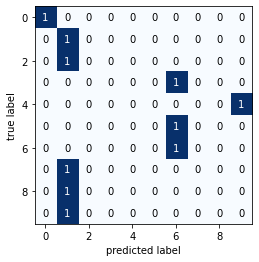

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
print(metrics.classification_report(list_data_answers, list_data_FoundCode))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.20      1.00      0.33         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.33      1.00      0.50         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.30        10
   macro avg       0.15      0.30      0.18        10
weighted avg       0.15      0.30      0.18        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Dataset2-Medium

## Importing Data

In [ ]:
import pandas as pd;
#Loading dataset and renaming columns

df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Deep_Learning_ML_Engineering/data/FAQ_standard.csv");
df.columns=["questions","answers","AnswerCode"];

df

,questions,answers,AnswerCode
0,What does the job hunting experience look like ?,Job hunting experience involves networking to ...,1
1,Any insights you can offer about the DS job ma...,"There are many kinds of roles, data scientist,...",2
2,What's the impact of Covid on hiring for DS ro...,Hiring is going to slow down. First in small c...,3
3,What skills and qualities do employers look fo...,The following are some skills employers usuall...,4
4,Do employers look for an advanced ML degree?,For more senior roles: People typically look f...,5
5,How does a typical day of a data scientist loo...,Here are some tasks in the typical day of a da...,6
6,Is preparation of algorithms and data structur...,Yes. In many data science interviews (ML Scien...,7
7,What is the mathematical background required t...,The following three are the basic building blo...,8
8,What are the various rounds in a data scientis...,Usually the data science interview has a subse...,9
9,What level of proficiency is needed for a data...,"Needs to be reasonably proficient. Again, a da...",10


In [ ]:
import pandas as pd;

#Load dataset and rename columns 

df_test=pd.read_excel("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Deep_Learning_ML_Engineering/data/FAQ_test_Medium.xlsx")
df_test.columns=["questions","ActualCode","PredictedCode","Prediction?","ActualQuestion","PredictedQuestion"]

df_test

,questions,ActualCode,PredictedCode,Prediction?,ActualQuestion,PredictedQuestion
0,How does job searching experience would look?,1,NaN,NaN,What does the job hunting experience look like ?,NaN
1,Please provide how DS jobs are in the market?,2,NaN,NaN,Any insights you can offer about the DS job ma...,NaN
2,How has the Covid impacted DS hiring?,3,NaN,NaN,What's the impact of Covid on hiring for DS ro...,NaN
3,What skills do employers want from data scienc...,4,NaN,NaN,What skills and qualities do employers look fo...,NaN
4,Is advanced degree in ML required?,5,NaN,NaN,Do employers look for an advanced ML degree?,NaN
5,What data scientist do in a typical day?,6,NaN,NaN,How does a typical day of a data scientist loo...,NaN
6,For an interview in data science are we requir...,7,NaN,NaN,Is preparation of algorithms and data structur...,NaN
7,What is the mathematical background required t...,8,NaN,NaN,What is the mathematical background required t...,NaN
8,How many rounds of interview are required to c...,9,NaN,NaN,What are the various rounds in a data scientis...,NaN
9,How much proficient a data scientist should be...,10,NaN,NaN,What level of proficiency is needed for a data...,NaN


##Data Processing

In [ ]:
import re
import gensim 
from gensim.parsing.preprocessing import remove_stopwords


def clean_sentence(sentence, stopwords=False):
    
    sentence = sentence.lower().strip()
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence)

    
    if stopwords:
         sentence = remove_stopwords(sentence)
    
    
    return sentence
                    
def get_cleaned_sentences(tf,stopwords=False):    
    sents=tf[["questions"]];
    cleaned_sentences=[]

    for index,row in tf.iterrows():
        #print(index,row)
        cleaned=clean_sentence(row["questions"],stopwords);
        cleaned_sentences.append(cleaned);
    return cleaned_sentences;

cleaned_sentences=get_cleaned_sentences(df,stopwords=True)
print(cleaned_sentences);

print("\n")

cleaned_sentences_with_stopwords=get_cleaned_sentences(df,stopwords=False)
print(cleaned_sentences_with_stopwords);

['job hunting experience look like', 'insights offer ds job market', 'whats impact covid hiring ds roles', 'skills qualities employers look data scientist', 'employers look advanced ml degree', 'typical day data scientist look like', 'preparation algorithms data structures needed data science interview', 'mathematical background required data scientist', 'rounds data scientist interview', 'level proficiency needed data scientist coding']


['what does the job hunting experience look like ', 'any insights you can offer about the ds job market ', 'whats the impact of covid on hiring for ds roles', 'what skills and qualities do employers look for in a data scientist', 'do employers look for an advanced ml degree', 'how does a typical day of a data scientist look like', 'is preparation of algorithms and data structures needed for a data science interview ', 'what is the mathematical background required to be a data scientist ', 'what are the various rounds in a data scientist interview ', 

In [ ]:
print(cleaned_sentences_with_stopwords[0]);

what does the job hunting experience look like 


##Bag of Words Model

In [ ]:
import numpy
import pprint

sentences=cleaned_sentences_with_stopwords


# Split it by white space 
sentence_words = [[word for word in document.split() ]
         for document in sentences]

from gensim import corpora

dictionary = corpora.Dictionary(sentence_words)
'''
for key, value in dictionary.items():
    print(key, ' : ', value)
'''

bow_corpus = [dictionary.doc2bow(text) for text in sentence_words]
'''
for sent,embedding in zip(sentences,bow_corpus):
    print(sent)
    print(embedding)
'''


'\nfor sent,embedding in zip(sentences,bow_corpus):\n    print(sent)\n    print(embedding)\n'

In [ ]:
#question_orig="What does a data scientist usually do ?"
#question_orig=input()
cleaned_sentences_test=get_cleaned_sentences(df_test,stopwords=False)
print(cleaned_sentences_test);



['how does job searching experience would look', 'please provide how ds jobs are in the market', 'how has the covid impacted ds hiring', 'what skills do employers want from data science positions', 'is advanced degree in ml required', 'what data scientist do in a typical day', 'for an interview in data science are we required to study algorithms', 'what is the mathematical background required to be a data scientist ', 'how many rounds of interview are required to clear data scientist interview ', 'how much proficient a data scientist should be in coding']


In [ ]:
import numpy
import pprint

sentences_test=cleaned_sentences_test


# Split it by white space 
sentence_words_test = [[word for word in document.split() ]
         for document in sentences_test]

from gensim import corpora

dictionary_test = corpora.Dictionary(sentence_words_test)

for key, value in dictionary_test.items():
    print(key, ' : ', value)


bow_corpus_test = [dictionary_test.doc2bow(text) for text in sentence_words_test]

for sent,embedding in zip(sentences_test,bow_corpus_test):
    print(sent)
    print(embedding)



0  :  does
1  :  experience
2  :  how
3  :  job
4  :  look
5  :  searching
6  :  would
7  :  are
8  :  ds
9  :  in
10  :  jobs
11  :  market
12  :  please
13  :  provide
14  :  the
15  :  covid
16  :  has
17  :  hiring
18  :  impacted
19  :  data
20  :  do
21  :  employers
22  :  from
23  :  positions
24  :  science
25  :  skills
26  :  want
27  :  what
28  :  advanced
29  :  degree
30  :  is
31  :  ml
32  :  required
33  :  a
34  :  day
35  :  scientist
36  :  typical
37  :  algorithms
38  :  an
39  :  for
40  :  interview
41  :  study
42  :  to
43  :  we
44  :  background
45  :  be
46  :  mathematical
47  :  clear
48  :  many
49  :  of
50  :  rounds
51  :  coding
52  :  much
53  :  proficient
54  :  should
how does job searching experience would look
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]
please provide how ds jobs are in the market
[(2, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]
how has the covid impacted ds hiring
[(2, 1), (8, 1), (14

In [ ]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity;
def retrieveAndPrintFAQAnswer(question_embeddings_test,sentence_embeddings,FAQdf,sentences,FAQdf_test,sentences_test):
  for index_test,faq_embedding_test in enumerate(question_embeddings_test):
    max_sim=-1;
    index_sim=-1;
    for index,faq_embedding in enumerate(sentence_embeddings):
        
      sim=cosine_similarity(faq_embedding,faq_embedding_test)[0][0];
      #print(index, sim, sentences[index])
      if sim>max_sim:
        max_sim=sim;
        index_sim=index;

    FAQdf_test.iloc[index_test,2]=FAQdf.iloc[index_sim,2]
    FAQdf_test.iloc[index_test,5]=FAQdf.iloc[index_sim,0]
    print("\n")
    print("Question: ",sentences_test[index_test])
    print("\n");
    print("Retrieved: ",FAQdf.iloc[index_sim,0]) 
    print("Answer:",FAQdf.iloc[index_sim,1])        
  df_test=FAQdf_test 
retrieveAndPrintFAQAnswer(bow_corpus_test,bow_corpus,df,sentences,df_test,sentences_test);



Question:  how does job searching experience would look


Retrieved:  What does the job hunting experience look like ?
Answer: Job hunting experience involves networking to get in touch with the right people in various companies, applying to lots of jobs through various channels, preparing for interviews – while interviews are uncertain it is necessary to prepare well what you CAN prepare, smart scheduling of interviews to get the best job and salary you can.


Question:  please provide how ds jobs are in the market


Retrieved:  Any insights you can offer about the DS job market ?
Answer: There are many kinds of roles, data scientist, analyst, data engineer and so on. There are many levels of companies. In smaller companies the roles are usually combined into one while in larger companies there are more nuanced roles. Since more and more companies are just getting started on their data journey, the overall demand is expected to increase in the next few years.


Question:  how has th

In [ ]:
df_test

,questions,ActualCode,PredictedCode,Prediction?,ActualQuestion,PredictedQuestion
0,How does job searching experience would look?,1,1.0,NaN,What does the job hunting experience look like ?,What does the job hunting experience look like ?
1,Please provide how DS jobs are in the market?,2,2.0,NaN,Any insights you can offer about the DS job ma...,Any insights you can offer about the DS job ma...
2,How has the Covid impacted DS hiring?,3,2.0,NaN,What's the impact of Covid on hiring for DS ro...,Any insights you can offer about the DS job ma...
3,What skills do employers want from data scienc...,4,7.0,NaN,What skills and qualities do employers look fo...,Is preparation of algorithms and data structur...
4,Is advanced degree in ML required?,5,10.0,NaN,Do employers look for an advanced ML degree?,What level of proficiency is needed for a data...
5,What data scientist do in a typical day?,6,10.0,NaN,How does a typical day of a data scientist loo...,What level of proficiency is needed for a data...
6,For an interview in data science are we requir...,7,10.0,NaN,Is preparation of algorithms and data structur...,What level of proficiency is needed for a data...
7,What is the mathematical background required t...,8,7.0,NaN,What is the mathematical background required t...,Is preparation of algorithms and data structur...
8,How many rounds of interview are required to c...,9,2.0,NaN,What are the various rounds in a data scientis...,Any insights you can offer about the DS job ma...
9,How much proficient a data scientist should be...,10,2.0,NaN,What level of proficiency is needed for a data...,Any insights you can offer about the DS job ma...


In [ ]:
for i in range(df_test.shape[0]):
 if df_test.iloc[i,1]!=df_test.iloc[i,2]:
   df_test.iloc[i,3]='InCorrect'
 else:
   df_test.iloc[i,3]='correct'


In [ ]:
df_test

,questions,ActualCode,PredictedCode,Prediction?,ActualQuestion,PredictedQuestion
0,How does job searching experience would look?,1,1.0,correct,What does the job hunting experience look like ?,What does the job hunting experience look like ?
1,Please provide how DS jobs are in the market?,2,2.0,correct,Any insights you can offer about the DS job ma...,Any insights you can offer about the DS job ma...
2,How has the Covid impacted DS hiring?,3,2.0,InCorrect,What's the impact of Covid on hiring for DS ro...,Any insights you can offer about the DS job ma...
3,What skills do employers want from data scienc...,4,7.0,InCorrect,What skills and qualities do employers look fo...,Is preparation of algorithms and data structur...
4,Is advanced degree in ML required?,5,10.0,InCorrect,Do employers look for an advanced ML degree?,What level of proficiency is needed for a data...
5,What data scientist do in a typical day?,6,10.0,InCorrect,How does a typical day of a data scientist loo...,What level of proficiency is needed for a data...
6,For an interview in data science are we requir...,7,10.0,InCorrect,Is preparation of algorithms and data structur...,What level of proficiency is needed for a data...
7,What is the mathematical background required t...,8,7.0,InCorrect,What is the mathematical background required t...,Is preparation of algorithms and data structur...
8,How many rounds of interview are required to c...,9,2.0,InCorrect,What are the various rounds in a data scientis...,Any insights you can offer about the DS job ma...
9,How much proficient a data scientist should be...,10,2.0,InCorrect,What level of proficiency is needed for a data...,Any insights you can offer about the DS job ma...


In [ ]:
list_data_answers=df_test.ActualCode.values.tolist()
list_data_FoundCode=df_test.PredictedCode.values.tolist()

In [ ]:
list_data_FoundCode

[1.0, 2.0, 2.0, 7.0, 10.0, 10.0, 10.0, 7.0, 2.0, 2.0]

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
multilabel_confusion_matrix(list_data_answers, list_data_FoundCode)
#tn, fp, fn, tp = confusion_matrix([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1.0, 2.0, 2.0, 10.0, 4.0, 1.0, 2.0, 1.0, 2.0, 2.0]).ravel()
#print(metrics.classification_report(list_data_answers, list_data_FoundCode))

array([[[9, 0],
        [0, 1]],

       [[6, 3],
        [0, 1]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[7, 2],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[6, 3],
        [1, 0]]])

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix


cm = confusion_matrix(list_data_answers, list_data_FoundCode, binary=False)

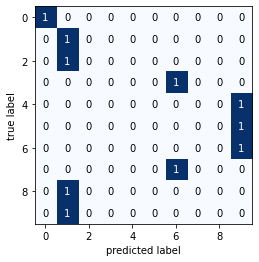

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
print(metrics.classification_report(list_data_answers, list_data_FoundCode))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.25      1.00      0.40         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.20        10
   macro avg       0.12      0.20      0.14        10
weighted avg       0.12      0.20      0.14        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Dataset2-Hard

## Importing Data

In [ ]:
import pandas as pd;
#Loading dataset and renaming columns

df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Deep_Learning_ML_Engineering/data/FAQ_standard.csv");
df.columns=["questions","answers","AnswerCode"];

df

,questions,answers,AnswerCode
0,What does the job hunting experience look like ?,Job hunting experience involves networking to ...,1
1,Any insights you can offer about the DS job ma...,"There are many kinds of roles, data scientist,...",2
2,What's the impact of Covid on hiring for DS ro...,Hiring is going to slow down. First in small c...,3
3,What skills and qualities do employers look fo...,The following are some skills employers usuall...,4
4,Do employers look for an advanced ML degree?,For more senior roles: People typically look f...,5
5,How does a typical day of a data scientist loo...,Here are some tasks in the typical day of a da...,6
6,Is preparation of algorithms and data structur...,Yes. In many data science interviews (ML Scien...,7
7,What is the mathematical background required t...,The following three are the basic building blo...,8
8,What are the various rounds in a data scientis...,Usually the data science interview has a subse...,9
9,What level of proficiency is needed for a data...,"Needs to be reasonably proficient. Again, a da...",10


In [ ]:
import pandas as pd;

#Load dataset and rename columns 

df_test=pd.read_excel("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Deep_Learning_ML_Engineering/data/FAQ_test_Hard.xlsx")
df_test.columns=["questions","ActualCode","PredictedCode","Prediction?","ActualQuestion","PredictedQuestion"]

df_test

,questions,ActualCode,PredictedCode,Prediction?,ActualQuestion,PredictedQuestion
0,How difficult is it to find a job?,1,NaN,NaN,What does the job hunting experience look like ?,NaN
1,Please provide how data science jobs are in th...,2,NaN,NaN,Any insights you can offer about the DS job ma...,NaN
2,How has the Covid impacted job?,3,NaN,NaN,What's the impact of Covid on hiring for DS ro...,NaN
3,Tell me about the skills required for Data sci...,4,NaN,NaN,What skills and qualities do employers look fo...,NaN
4,Is advanced knowledge of ML required?,5,NaN,NaN,Do employers look for an advanced ML degree?,NaN
5,What are the tasks performed by a data scienti...,6,NaN,NaN,How does a typical day of a data scientist loo...,NaN
6,How much is data structure important for data ...,7,NaN,NaN,Is preparation of algorithms and data structur...,NaN
7,How much maths knowledge is required to get a ...,8,NaN,NaN,What is the mathematical background required t...,NaN
8,How many rounds of interview is done for data ...,9,NaN,NaN,What are the various rounds in a data scientis...,NaN
9,How much coding experience is required for dat...,10,NaN,NaN,What level of proficiency is needed for a data...,NaN


##Data Processing

In [ ]:
import re
import gensim 
from gensim.parsing.preprocessing import remove_stopwords


def clean_sentence(sentence, stopwords=False):
    
    sentence = sentence.lower().strip()
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence)

    
    if stopwords:
         sentence = remove_stopwords(sentence)
    
    
    return sentence
                    
def get_cleaned_sentences(tf,stopwords=False):    
    sents=tf[["questions"]];
    cleaned_sentences=[]

    for index,row in tf.iterrows():
        #print(index,row)
        cleaned=clean_sentence(row["questions"],stopwords);
        cleaned_sentences.append(cleaned);
    return cleaned_sentences;

cleaned_sentences=get_cleaned_sentences(df,stopwords=True)
print(cleaned_sentences);

print("\n")

cleaned_sentences_with_stopwords=get_cleaned_sentences(df,stopwords=False)
print(cleaned_sentences_with_stopwords);

['job hunting experience look like', 'insights offer ds job market', 'whats impact covid hiring ds roles', 'skills qualities employers look data scientist', 'employers look advanced ml degree', 'typical day data scientist look like', 'preparation algorithms data structures needed data science interview', 'mathematical background required data scientist', 'rounds data scientist interview', 'level proficiency needed data scientist coding']


['what does the job hunting experience look like ', 'any insights you can offer about the ds job market ', 'whats the impact of covid on hiring for ds roles', 'what skills and qualities do employers look for in a data scientist', 'do employers look for an advanced ml degree', 'how does a typical day of a data scientist look like', 'is preparation of algorithms and data structures needed for a data science interview ', 'what is the mathematical background required to be a data scientist ', 'what are the various rounds in a data scientist interview ', 

In [ ]:
print(cleaned_sentences_with_stopwords[0]);

what does the job hunting experience look like 


##Bag of Words Model

In [ ]:
import numpy
import pprint

sentences=cleaned_sentences_with_stopwords


# Split it by white space 
sentence_words = [[word for word in document.split() ]
         for document in sentences]

from gensim import corpora

dictionary = corpora.Dictionary(sentence_words)
'''
for key, value in dictionary.items():
    print(key, ' : ', value)
'''

bow_corpus = [dictionary.doc2bow(text) for text in sentence_words]
'''
for sent,embedding in zip(sentences,bow_corpus):
    print(sent)
    print(embedding)
'''


'\nfor sent,embedding in zip(sentences,bow_corpus):\n    print(sent)\n    print(embedding)\n'

In [ ]:
#question_orig="What does a data scientist usually do ?"
#question_orig=input()
cleaned_sentences_test=get_cleaned_sentences(df_test,stopwords=False)
print(cleaned_sentences_test);



['how difficult is it to find a job', 'please provide how data science jobs are in the market', 'how has the covid impacted job', 'tell me about the skills required for data science in the industry', 'is advanced knowledge of ml required', 'what are the tasks performed by a data scientist in a day', 'how much is data structure important for data science positions', 'how much maths knowledge is required to get a data science job', 'how many rounds of interview is done for data science roles', 'how much coding experience is required for data science positions']


In [ ]:
import numpy
import pprint

sentences_test=cleaned_sentences_test


# Split it by white space 
sentence_words_test = [[word for word in document.split() ]
         for document in sentences_test]

from gensim import corpora

dictionary_test = corpora.Dictionary(sentence_words_test)

for key, value in dictionary_test.items():
    print(key, ' : ', value)


bow_corpus_test = [dictionary_test.doc2bow(text) for text in sentence_words_test]

for sent,embedding in zip(sentences_test,bow_corpus_test):
    print(sent)
    print(embedding)



0  :  a
1  :  difficult
2  :  find
3  :  how
4  :  is
5  :  it
6  :  job
7  :  to
8  :  are
9  :  data
10  :  in
11  :  jobs
12  :  market
13  :  please
14  :  provide
15  :  science
16  :  the
17  :  covid
18  :  has
19  :  impacted
20  :  about
21  :  for
22  :  industry
23  :  me
24  :  required
25  :  skills
26  :  tell
27  :  advanced
28  :  knowledge
29  :  ml
30  :  of
31  :  by
32  :  day
33  :  performed
34  :  scientist
35  :  tasks
36  :  what
37  :  important
38  :  much
39  :  positions
40  :  structure
41  :  get
42  :  maths
43  :  done
44  :  interview
45  :  many
46  :  roles
47  :  rounds
48  :  coding
49  :  experience
how difficult is it to find a job
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
please provide how data science jobs are in the market
[(3, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]
how has the covid impacted job
[(3, 1), (6, 1), (16, 1), (17, 1), (18, 1), (19, 1)]
tell me about the skills req

In [ ]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity;
def retrieveAndPrintFAQAnswer(question_embeddings_test,sentence_embeddings,FAQdf,sentences,FAQdf_test,sentences_test):
  for index_test,faq_embedding_test in enumerate(question_embeddings_test):
    max_sim=-1;
    index_sim=-1;
    for index,faq_embedding in enumerate(sentence_embeddings):
        
      sim=cosine_similarity(faq_embedding,faq_embedding_test)[0][0];
      #print(index, sim, sentences[index])
      if sim>max_sim:
        max_sim=sim;
        index_sim=index;

    FAQdf_test.iloc[index_test,2]=FAQdf.iloc[index_sim,2]
    FAQdf_test.iloc[index_test,5]=FAQdf.iloc[index_sim,0]
    print("\n")
    print("Question: ",sentences_test[index_test])
    print("\n");
    print("Retrieved: ",FAQdf.iloc[index_sim,0]) 
    print("Answer:",FAQdf.iloc[index_sim,1])        
  df_test=FAQdf_test 
retrieveAndPrintFAQAnswer(bow_corpus_test,bow_corpus,df,sentences,df_test,sentences_test);



Question:  how difficult is it to find a job


Retrieved:  What does the job hunting experience look like ?
Answer: Job hunting experience involves networking to get in touch with the right people in various companies, applying to lots of jobs through various channels, preparing for interviews – while interviews are uncertain it is necessary to prepare well what you CAN prepare, smart scheduling of interviews to get the best job and salary you can.


Question:  please provide how data science jobs are in the market


Retrieved:  Any insights you can offer about the DS job market ?
Answer: There are many kinds of roles, data scientist, analyst, data engineer and so on. There are many levels of companies. In smaller companies the roles are usually combined into one while in larger companies there are more nuanced roles. Since more and more companies are just getting started on their data journey, the overall demand is expected to increase in the next few years.


Question:  how has the

In [ ]:
df_test

,questions,ActualCode,PredictedCode,Prediction?,ActualQuestion,PredictedQuestion
0,How difficult is it to find a job?,1,1.0,NaN,What does the job hunting experience look like ?,What does the job hunting experience look like ?
1,Please provide how data science jobs are in th...,2,2.0,NaN,Any insights you can offer about the DS job ma...,Any insights you can offer about the DS job ma...
2,How has the Covid impacted job?,3,2.0,NaN,What's the impact of Covid on hiring for DS ro...,Any insights you can offer about the DS job ma...
3,Tell me about the skills required for Data sci...,4,10.0,NaN,What skills and qualities do employers look fo...,What level of proficiency is needed for a data...
4,Is advanced knowledge of ML required?,5,4.0,NaN,Do employers look for an advanced ML degree?,What skills and qualities do employers look fo...
5,What are the tasks performed by a data scienti...,6,1.0,NaN,How does a typical day of a data scientist loo...,What does the job hunting experience look like ?
6,How much is data structure important for data ...,7,2.0,NaN,Is preparation of algorithms and data structur...,Any insights you can offer about the DS job ma...
7,How much maths knowledge is required to get a ...,8,1.0,NaN,What is the mathematical background required t...,What does the job hunting experience look like ?
8,How many rounds of interview is done for data ...,9,2.0,NaN,What are the various rounds in a data scientis...,Any insights you can offer about the DS job ma...
9,How much coding experience is required for dat...,10,2.0,NaN,What level of proficiency is needed for a data...,Any insights you can offer about the DS job ma...


In [ ]:
for i in range(df_test.shape[0]):
 if df_test.iloc[i,1]!=df_test.iloc[i,2]:
   df_test.iloc[i,3]='InCorrect'
 else:
   df_test.iloc[i,3]='correct'


In [ ]:
df_test

,questions,ActualCode,PredictedCode,Prediction?,ActualQuestion,PredictedQuestion
0,How difficult is it to find a job?,1,1.0,correct,What does the job hunting experience look like ?,What does the job hunting experience look like ?
1,Please provide how data science jobs are in th...,2,2.0,correct,Any insights you can offer about the DS job ma...,Any insights you can offer about the DS job ma...
2,How has the Covid impacted job?,3,2.0,InCorrect,What's the impact of Covid on hiring for DS ro...,Any insights you can offer about the DS job ma...
3,Tell me about the skills required for Data sci...,4,10.0,InCorrect,What skills and qualities do employers look fo...,What level of proficiency is needed for a data...
4,Is advanced knowledge of ML required?,5,4.0,InCorrect,Do employers look for an advanced ML degree?,What skills and qualities do employers look fo...
5,What are the tasks performed by a data scienti...,6,1.0,InCorrect,How does a typical day of a data scientist loo...,What does the job hunting experience look like ?
6,How much is data structure important for data ...,7,2.0,InCorrect,Is preparation of algorithms and data structur...,Any insights you can offer about the DS job ma...
7,How much maths knowledge is required to get a ...,8,1.0,InCorrect,What is the mathematical background required t...,What does the job hunting experience look like ?
8,How many rounds of interview is done for data ...,9,2.0,InCorrect,What are the various rounds in a data scientis...,Any insights you can offer about the DS job ma...
9,How much coding experience is required for dat...,10,2.0,InCorrect,What level of proficiency is needed for a data...,Any insights you can offer about the DS job ma...


In [ ]:
list_data_answers=df_test.ActualCode.values.tolist()
list_data_FoundCode=df_test.PredictedCode.values.tolist()

In [ ]:
list_data_FoundCode

[1.0, 2.0, 2.0, 10.0, 4.0, 1.0, 2.0, 1.0, 2.0, 2.0]

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
multilabel_confusion_matrix(list_data_answers, list_data_FoundCode)
#tn, fp, fn, tp = confusion_matrix([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1.0, 2.0, 2.0, 10.0, 4.0, 1.0, 2.0, 1.0, 2.0, 2.0]).ravel()
#print(metrics.classification_report(list_data_answers, list_data_FoundCode))

array([[[7, 2],
        [0, 1]],

       [[5, 4],
        [0, 1]],

       [[9, 0],
        [1, 0]],

       [[8, 1],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[9, 0],
        [1, 0]],

       [[8, 1],
        [1, 0]]])

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix


cm = confusion_matrix(list_data_answers, list_data_FoundCode, binary=False)

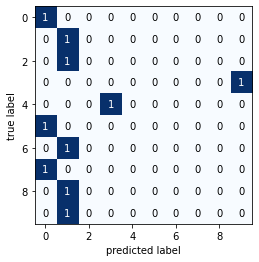

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
print(metrics.classification_report(list_data_answers, list_data_FoundCode))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       0.20      1.00      0.33         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.20        10
   macro avg       0.05      0.20      0.08        10
weighted avg       0.05      0.20      0.08        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1><b>Word2Vec</b>

##Import Dataset

In [ ]:
import pandas as pd;

#Loading dataset and rename columns

df=pd.read_excel("/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Deep_Learning_ML_Engineering/data/healthtapQAs_v1.xlsx");
df.columns=["questions","answers"];

df

,questions,answers
0,zirconium dental implants. how common is it us...,a majority of the dental implants placed are t...
1,zoloft/ sertaline cause heart racing can't sit...,check with your doc could be side effect of th...
2,zoloft (sertraline) side effects? does it make...,it can be related to either weight gain or los...
3,yellow skin around wound from cat bite. why?,this may be the secondary result of a resolvin...
4,yeast infection and open sores major swelling ...,bathing in a bath with baking soda may help de...
...,...,...
18622,what foods or workout will help me loose belly...,there is no particular food or diet that works...
18623,while i'm awake does lying on my back or my be...,probably not so much while you are awake. that...
18624,will removing tonsils and weight loss will imp...,weight loss alone will make a huge difference ...
18625,will eating grapefruit harm me in any way taki...,grapefruit and some other citrous fruits (tang...


##Data Preprocessing

In [ ]:
import re
import gensim 
from gensim.parsing.preprocessing import remove_stopwords

#keeping only words in the sentence and removing punctuations.

def clean_sentence(sentence, stopwords=False):
    
    sentence = sentence.lower().strip()
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence)

    
    if stopwords:
         sentence = remove_stopwords(sentence)
    

    
    return sentence
                    
def get_cleaned_sentences(df,stopwords=False):    
    sents=df[["questions"]];
    cleaned_sentences=[]

    for index,row in df.iterrows():
        #print(index,row)
        cleaned=clean_sentence(row["questions"],stopwords);
        cleaned_sentences.append(cleaned);
    return cleaned_sentences;

cleaned_sentences=get_cleaned_sentences(df,stopwords=True)
#print(cleaned_sentences);

print("\n")

cleaned_sentences_with_stopwords=get_cleaned_sentences(df,stopwords=False)
#print(cleaned_sentences_with_stopwords[0]);

In [ ]:
print(cleaned_sentences_with_stopwords[0]);

zirconium dental implants how common is it used now is there any advantages or benefits over titanium implants cons  pros please thanks


##Word2Vec-Skipgram Model

In [ ]:
from gensim.models import Word2Vec 
import gensim.downloader as api

#loading Word2vec google news pretrained model  
v2w_model=None;
try:
    v2w_model = gensim.models.KeyedVectors.load("./w2vecmodel.mod")
    print("Loaded saved W2V model")
except:            
    v2w_model = api.load('word2vec-google-news-300')
    v2w_model.save("./w2vecmodel.mod")
    print("Downloaded and saved glove model")

w2vec_embedding_size=len(v2w_model['computer']);

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Downloaded and saved glove model


In [67]:
#creating vectors
def getWordVec(word,model):
        samp=model['computer'];
        vec=[0]*len(samp);
        try:
                vec=model[word];
        except:
                vec=[0]*len(samp);
        return (vec)


def getPhraseEmbedding(phrase,embeddingmodel):
                       
        samp=getWordVec('computer', embeddingmodel);
        vec=numpy.array([0]*len(samp));
        den=0;
        for word in phrase.split():
            #print(word)
            den=den+1;
            vec=vec+numpy.array(getWordVec(word,embeddingmodel));

        return vec.reshape(1, -1)

In [68]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity;
#finding cosine similarity from vectors
def retrieveAndPrintFAQAnswer(question_embedding,sentence_embeddings,FAQdf,sentences):
    max_sim=-1;
    index_sim=-1;
    for index,faq_embedding in enumerate(sentence_embeddings):
        #sim=cosine_similarity(embedding.reshape(1, -1),question_embedding.reshape(1, -1))[0][0];
        sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
        print(index, sim, sentences[index])
        if sim>max_sim:
            max_sim=sim;
            index_sim=index;
    print("\n")
    print("Question: ",question)
    print("\n");
    print("Retrieved: ",FAQdf.iloc[index_sim,0]) 
    print(FAQdf.iloc[index_sim,1]) 

In [69]:
question_orig="How to keep good health?"
#question_orig=input()
question=clean_sentence(question_orig,stopwords=False);

In [70]:
#With w2Vec
import numpy
sent_embeddings=[];
for sent in cleaned_sentences:
    sent_embeddings.append(getPhraseEmbedding(sent,v2w_model));

question_embedding=getPhraseEmbedding(question,v2w_model);

retrieveAndPrintFAQAnswer(question_embedding,sent_embeddings,df, cleaned_sentences);

Streaming output truncated to the last 5000 lines.
13634 0.46187578756313846 cure type 2 diabetes control healthy diet exercise medications
13635 0.48360187521210873 dont want body like body builders girl abdominal crunch abs excercise reduce belly fat safe
13636 0.5177774478878526 reflux esophagitis taking prilosec 40mg daily lost lots weight good diet plan need eat
13637 0.5547934198209137 good drink milk thing morning eat
13638 0.48861496926759507 saffron beneficial general health working weight loss
13639 0.4136295803179836 need tips stop binging
13640 0.38364452368840957 im 26 yr old female standing 52 weigh bmi calculators different
13641 0.1758112094746577 alli fda approved
13642 0.14624262573181837 ia alli orlista
13643 0.3809097679107258 wondering milkteas add calories diet
13644 0.4342069004569866 im taking quasense birth control pills wondering safe diet pill zantrex 3 prior bc liked
13645 0.5487286450987776 heard walking optimum way burn fat instead running lifting weights 

#Implementing Chatbot using Word2Vec

In [71]:
#embedding the exsiting dataset
sent_embeddings=[];
for sent in cleaned_sentences:
  sent_embeddings.append(getPhraseEmbedding(sent,v2w_model));

In [72]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity;
import numpy
import time

print("Welcome to the Question Answering System")      

while True:
  print("Question:") 
  
  question_orig=input()
  
  if (question_orig.lower()=='quit'):
    break
  measure1 = time.time()
  question=clean_sentence(question_orig,stopwords=False);
  


  question_embedding=getPhraseEmbedding(question,v2w_model);  
  def retrieveAndPrintFAQAnswer(question_embedding,sentence_embeddings,FAQdf,sentences):
    max_sim=-1;
    index_sim=-1;
    for index,faq_embedding in enumerate(sentence_embeddings):
      sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
      #print(index, sim, sentences[index])
      if sim>max_sim:
        max_sim=sim;
        index_sim=index;
    #print("\n")
    #print("Question: ",question)
    #print("\n");
    #print("Retrieved: ",FAQdf.iloc[index_sim,0]) 
    #print(FAQdf.iloc[index_sim,1]) 
    print("Answer:",FAQdf.iloc[index_sim,1])
    print("----------------------")
    measure2 = time.time()
    print("Response Time",measure2 - measure1)
    print("----------------------")
    print("\n");
    print("Enter Quit to exit: ")
  retrieveAndPrintFAQAnswer(question_embedding,sent_embeddings,df, cleaned_sentences);




print("----------------------")
print("Thank You")
print("----------------------")

Welcome to the Question Answering System
Question:
how does job searching experience would look
Answer: airway / breathing / circulation
----------------------
Response Time 4.638662815093994
----------------------


Enter Quit to exit: 
Question:
quit
----------------------
Thank You
----------------------
